In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
img=image.load_img("images/train/Not_Happy/download (3).jpg")

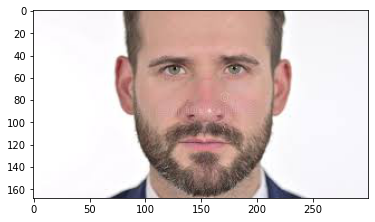

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("images/train/Not_Happy/download (3).jpg").shape

(168, 300, 3)

In [6]:
img1=image.load_img("images/train/happy/download (1).jpg")

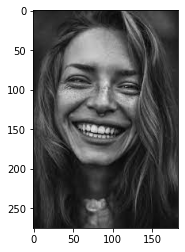

In [7]:
plt.imshow(img1)

In [30]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [38]:
train_dataset=train.flow_from_directory('images/train/',target_size=(200,200),
                                        batch_size=2,
                                        class_mode= 'binary')

Found 32 images belonging to 2 classes.


In [39]:
validation_dataset=train.flow_from_directory('images/Validation/',target_size=(200,200),
                                        batch_size=2,
                                        class_mode= 'binary')

Found 12 images belonging to 3 classes.


In [40]:
train_dataset.class_indices

{'Not_Happy': 0, 'happy': 1}

In [41]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  
                                  
]
)

In [61]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['Accuracy'])

In [62]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=5,
                   epochs=35,
                   validation_data=validation_dataset)

Epoch 1/35
5/5 [==============================] - 2s 331ms/step - loss: 2.0559 - accuracy: 0.1000 - val_loss: -1.9842 - val_accuracy: 0.0000e+00
Epoch 2/35
5/5 [==============================] - 2s 312ms/step - loss: 0.0848 - accuracy: 0.0000e+00 - val_loss: -0.4458 - val_accuracy: 0.0000e+00
Epoch 3/35
5/5 [==============================] - 2s 319ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.2769 - val_accuracy: 0.0000e+00
Epoch 4/35
5/5 [==============================] - 2s 325ms/step - loss: 0.0010 - accuracy: 0.0000e+00 - val_loss: -0.4383 - val_accuracy: 0.0000e+00
Epoch 5/35
5/5 [==============================] - 2s 332ms/step - loss: 7.8816e-04 - accuracy: 0.0000e+00 - val_loss: -0.0507 - val_accuracy: 0.0000e+00
Epoch 6/35
5/5 [==============================] - 2s 345ms/step - loss: 4.1465e-04 - accuracy: 0.0000e+00 - val_loss: -0.5943 - val_accuracy: 0.0000e+00
Epoch 7/35
5/5 [==============================] - 2s 339ms/step - loss: 9.6146e-04 - accuracy: 0.0000e+

download (1).jpg


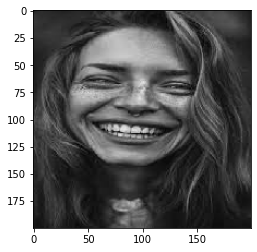

happy
download (2) - Copy - Copy.jpg


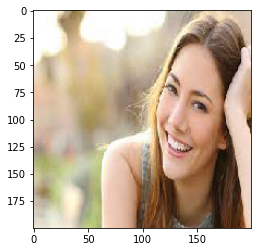

happy
download (2) - Copy.jpg


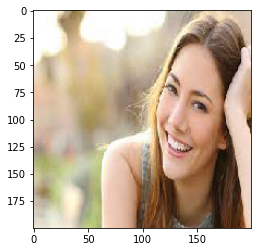

happy
download (2).jpg


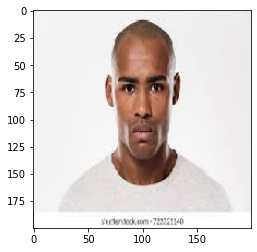

Not happy
download (3) - Copy.jpg


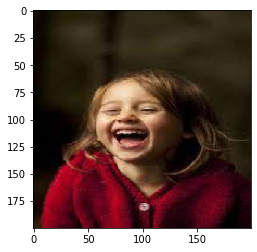

happy
download (3).jpg


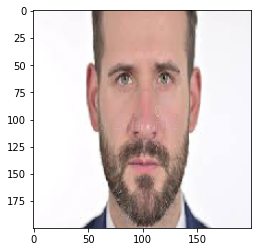

Not happy
download (4).jpg


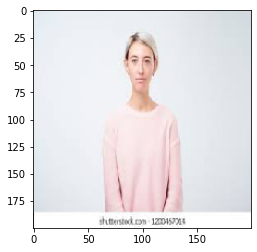

Not happy
download.jpg


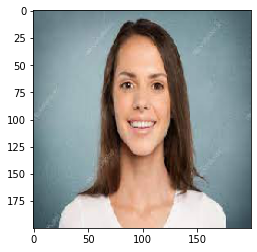

happy
images (1).jpg


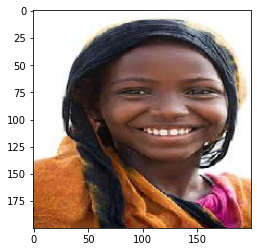

happy
images (10).jpg


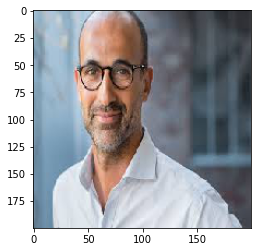

happy
images (11).jpg


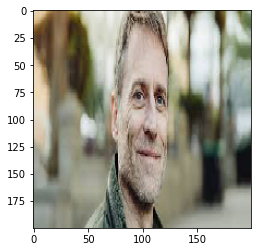

happy
images (12).jpg


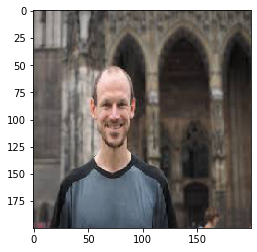

happy
images (2) - Copy.jpg


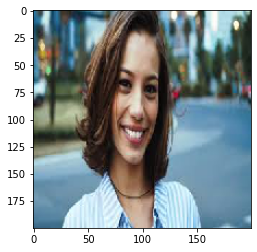

happy
images (2).jpg


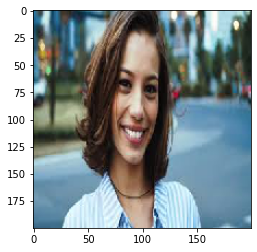

happy
images (3).jpg


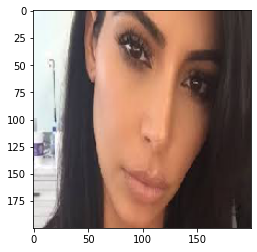

Not happy
images (5).jpg


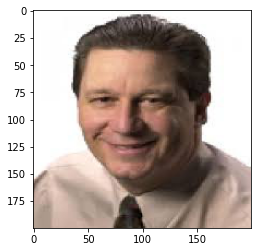

happy
images (6).jpg


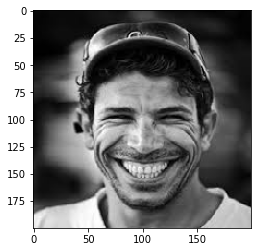

happy
images (7).jpg


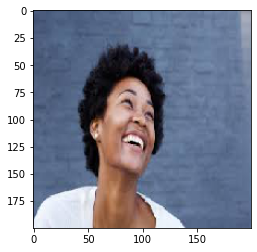

happy


In [70]:
dir_path='images/test/'
for i in os.listdir (dir_path):
    print(i)
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val==0:
        print("Not happy")
    else:
         print("happy")
    